# **A : Business Understanding**


According to the dataset we used, we have realized that many factors caused the churn for bank clients. Churn rate is important to banks because high churn rates or increasing churn rates over time can damage a company's profitability and limit its growth potential. Therefore, the ability to predict customer churn is critical to the company's success. As we know in the management of any business, it is always better and advantageous for the business to have a well understanding and know what leads a client towards the decision to leave the company. So based on the dataset, we can analyze and figure out the problems and allow companies to develop loyalty programs and retention activities to keep as many customers as possible. Hence, we are able to identify and classify the facts that caused churn for bank customers. 

Then, the purpose of doing churn rate prediction towards a bank is to get know what causes the churn rate the most to the bank. Hence, the bank is able to reduce the churn rate by doing precautions to minimize the causes.



In [63]:
#import google drive
#from google.colab import drive
#drive.mount('/content/datascience')

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt



The above codes are meant to import libraries and use their function for our program.

# B : Data Understanding



Based on the dataset we used, the columns of the dataset have 13 variables, and the rows of the dataset have 10000 data. After that, the variables in the columns are used to know the information about the customers such as customerID, Surname, CreditScore, Geography and others. Then, these variables in the columns are used to analyze and figure out the churn rate like the ‘Age’ variable can figure out older customers are less likely to leave their bank than younger ones based on the data of variables. Besides, the dataset we used has no missing value. 

Lastly, each variable stands for different meanings.  RowNumber  stands for the record (row) number and has no effect on the output. CustomerId stands for contains random values ​​and has no effect on customers leaving the bank. Then, Surname stands for the customer's last name and will not affect their decision to leave the bank. CreditScore is to know the score of credit can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. Geography is to determine a customer’s location can affect their decision to leave the bank. Next, the Gender variable is to explore if gender plays a role in customers leaving the bank. Besides, Age variables are of course relevant, because older customers are less likely to leave the bank than younger customers. Additionally, Tenure variable refers to the number of years the customer has become a bank customer. Generally, older customers are more loyal and less likely to leave the bank. Within the Tenure variable, there are many variables inside. Balance variable is also a good indicator of customer churn, because people with higher account balances are less likely to leave the bank than those with lower balances. Then, NumOfProducts variable refers to the number of products purchased by customers through the bank. HasCrCard indicates whether the customer has a credit card. This column is also important because the person with the credit card is less likely to leave the bank. Next, IsActiveMember variables can know active customers are seldom to leave the bank. EstimatedSalary variable is compared with people with higher salaries, people with lower salaries are more likely to leave the bank.


In [65]:
#import dataset
dataset = pd.read_csv('churn.csv', index_col='RowNumber')\
    .drop(['Surname', 'CustomerId'], axis=1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


The above code is meant to extract the dataset from google drive, then drop and ignore the ‘Surname’ and ‘CustomerId’ variables.


In [66]:
#check null value of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


The above code is meant to show the data and information from the dataset.

In [67]:
#check data type of dataset
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The above code is meant to check and verify the data type of variables.

In [68]:
#check information of dataset
print ("Rows     :" ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  \n",dataset.isnull().sum())
print ("\nUnique values :  \n",dataset.nunique())

Rows     : 10000
Columns  :  11

Features : 
 ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Missing values :  
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Unique values :  
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [69]:
#show the unique value of category columns
for i in dataset.columns:
  if len(dataset[i].unique()) < 5:
    print(i)
    print (dataset[i].unique())

Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
NumOfProducts
[1 3 2 4]
HasCrCard
[1 0]
IsActiveMember
[1 0]
Exited
[1 0]


In [70]:
#convert category columns into binary value
convertGeography = ['Geography']
for i in convertGeography:
  dataset[i].replace(to_replace='France',value=0,inplace=True)
  dataset[i].replace(to_replace='Spain',value=1,inplace=True)
  dataset[i].replace(to_replace='Germany',value=2,inplace=True)

convertGender = ['Gender']
for i in convertGender:
  dataset[i].replace(to_replace='Female',value=0,inplace=True)
  dataset[i].replace(to_replace='Male',value=1,inplace=True)

dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


In [71]:
#check the count,mean,min and etc of dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.749500,0.830433,0.00,0.00,0.000,2.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [72]:
#check 
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split


In [74]:
#Classify dataset into train dataset and test dataset
trainDataset,testDataset = train_test_split(dataset,test_size=0.3,random_state=100)
trainDataset



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1192,639,2,1,27,3,150795.81,1,0,1,85208.93,0
4459,633,0,1,37,2,0.00,2,1,0,182258.17,0
1132,500,1,1,37,9,125822.21,1,1,0,111698.00,0
9563,738,0,1,39,5,0.00,2,1,1,114388.98,0
6580,496,0,0,36,7,0.00,2,0,0,108098.28,0
...,...,...,...,...,...,...,...,...,...,...,...
351,659,1,1,32,3,107594.11,2,1,1,102416.84,0
80,416,2,0,41,10,122189.66,2,1,0,98301.61,0
8040,672,0,0,43,4,92599.55,2,1,1,167336.78,0


# C. EDA

In [75]:
exited = trainDataset[trainDataset["Exited"]==1]
non_exited = trainDataset[trainDataset["Exited"]==0]

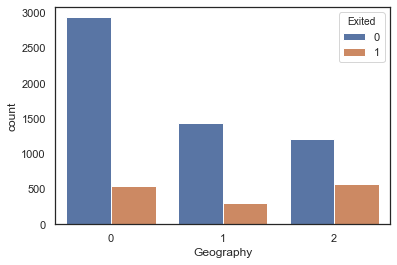

In [76]:

sns.countplot(x = 'Geography', hue = 'Exited',data = trainDataset)

#0 = France
#1 = Spain
#2 = Germany


**Geography** : Based on the bar chart, France has the highest number of non-exited customers and Spain is the second highest. Germany has the lowest number non-exited customers. Then, Germany has the highest exited customers and France is the second highest. Lastly, Spain has the lowest number of exited customers.


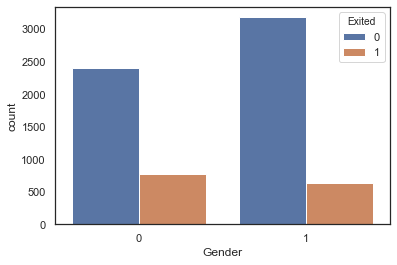

In [77]:
sns.countplot(x = 'Gender', hue = 'Exited',data = trainDataset)
#0 = Female
#1 = Male

**Gender** : According to the bar chart, female has the highest number of exited customers while male has the lowest number of exited customers. Then, male has the highest non-exited customers while female has the lowest non-exited customers.


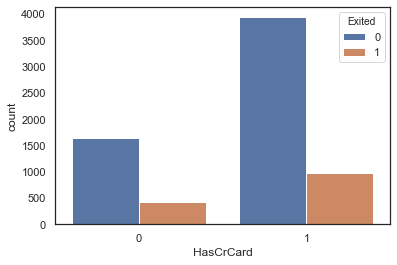

In [78]:
sns.countplot(x = 'HasCrCard', hue = 'Exited',data = trainDataset)
#0 = No Credit Card
#1 = Has Credit Card


**HasCrCard** : Based on the bar chart, the customers without credit cards have the lowest number of non-exited and exited customers. In the same time, the customers with credit cards have the highest number of non-exited and exited customers.


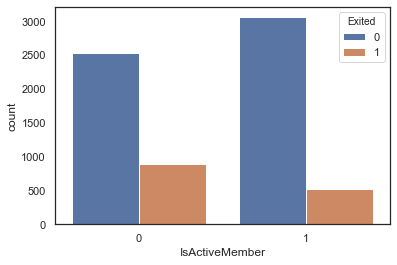

In [79]:
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = trainDataset)


**IsActiveMember** : According to the bar chart, inactive members have the lowest number of non-exited customers but active members have the highest number of non-exited numbers. Meanwhile, inactive members have the highest exited number of customers while active members have the lowest exited number of customers.


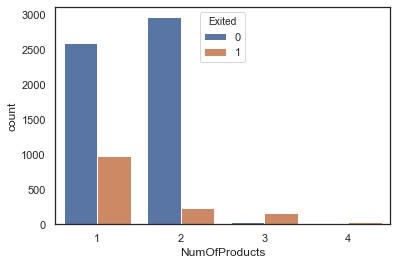

In [80]:
sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = trainDataset)


**NumOfProducts** : Based on the bar chart, the number of products that a customer has purchased through the bank is 1 has the highest of exited number of customers. Then, with 2 purchased is the second highest and 3 purchased is the third highest of exited number of customers. Lastly, 4 purchased is the lowest number of exited customers. Besides, customers with 2 purchased are the highest number of non-exited while 1 purchased is the second highest. Then, with 3 purchased is the third highest and 4 purchased is the lowest number of non-exited.


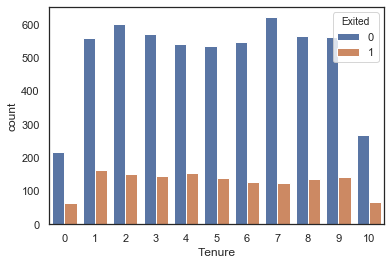

In [81]:
sns.countplot(x = 'Tenure', hue = 'Exited',data = trainDataset)

**Tenure** : According to the bar chart, the customers who have been a client of the bank for 7 years have the highest number of non-exited customers while those with 0 years have the lowest number of non-exited customers. Then, customers who have been a client of the bank for 1 year have the highest number of exited customers while those with 0 years have the lowest number of exited customers.


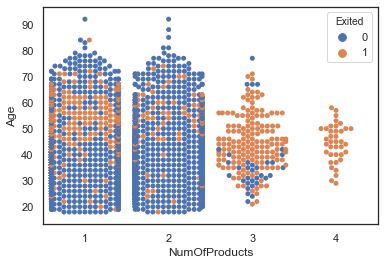

In [82]:
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = trainDataset)

**Swarmplot 1** : According to the swarmplot diagram, it shows the relationship of y value ‘Age’ and x value ‘NumOfProducts’ and ‘Exited’ variables.


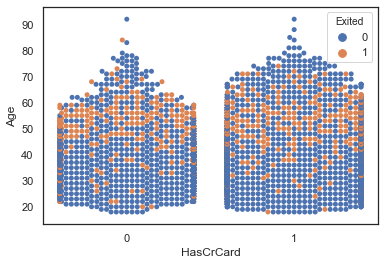

In [83]:
sns.swarmplot(x = "HasCrCard", y = "Age", data = trainDataset, hue="Exited")

**Swarmplot 2** : Based on the swarmplot diagram, it shows the relationship of y value ‘Age’ and x value ‘HasCrCard’ and ‘Exited’ variables.


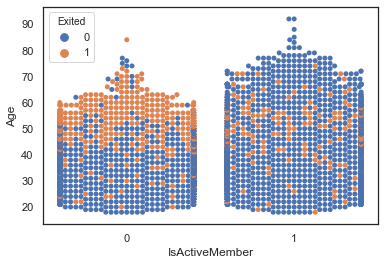

In [84]:
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = trainDataset)

**Swarmplot 3** : According to the swarmplot diagram, it shows the relationship of y value ‘Age’ and x value ‘IsActiveMember’ and ‘Exited’ variables.


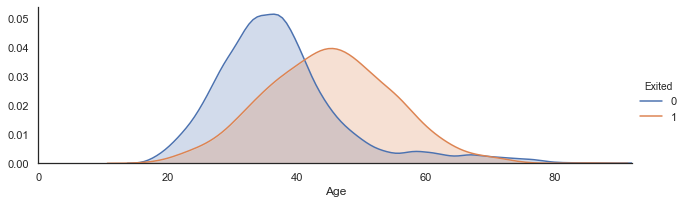

In [85]:
facet = sns.FacetGrid(trainDataset, hue = "Exited", aspect = 3)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, trainDataset["Age"].max()))
facet.add_legend()

#plt.show();

**FacetGrid **: Based on this diagram, it shows the relationship of ‘Age’ and ‘Exited’ variables.


In [86]:
import matplotlib.ticker as mtick

**Balance the number of churners and non-churners**

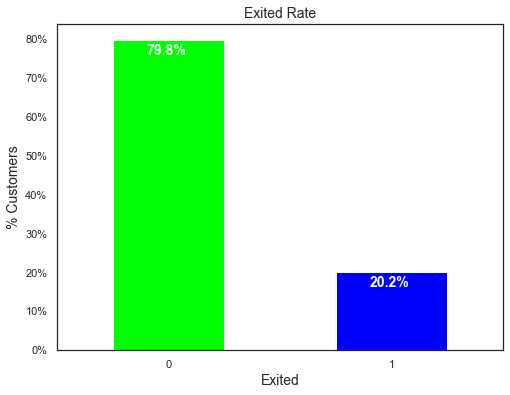

In [87]:
colors = ['#00FF00','#0000FF']
ax = (trainDataset['Exited'].value_counts()*100.0 /len(trainDataset)).plot(kind='bar', stacked=True,rot =0, color = colors, figsize = (8,6))


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Exited',size = 14)
ax.set_title('Exited Rate', size = 14)

totals = []

for i in ax.patches:
  totals.append(i.get_width())


total = sum(totals)

for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()-4.0, \
          str(round((i.get_height()/total),1))+'%',
          fontsize = 12,
          color='white',
          weight = 'bold',
          size = 14)

In [88]:
#Let the exited and non exited have the same value
exited_number = len(trainDataset[trainDataset['Exited'] ==1])
print("Number of Exited:",exited_number)

exitNum = (trainDataset[trainDataset['Exited']==1])

noExit = trainDataset[trainDataset['Exited']==0].sample(n=exited_number)
print("Number of not exited: ",len(noExit))
balance_trainDataset = exitNum.append(noExit)

Number of Exited: 1413
Number of not exited:  1413


In [89]:

X_train = balance_trainDataset.drop('Exited',axis=1)
X_test = testDataset.drop('Exited',axis=1)
Y_train = balance_trainDataset['Exited']
Y_test = testDataset['Exited']
X_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
139,584,1,0,48,2,213146.20,1,1,0,75161.25
36,475,0,0,45,0,134264.04,1,1,0,27822.99
552,674,2,1,47,6,106901.94,1,1,1,2079.20
3164,649,2,0,37,8,114737.26,1,1,1,106655.88
4713,474,0,1,54,3,0.00,1,1,0,108409.17


# D. Data Preprocessing
According to the EDA, we use the integer ‘0’ for France, ‘1’ for Spain and  ‘2’ for Germany in the Geography column. Then, we also use the integer ‘0’ for female and ‘1’ for male in the Gender column. Additionally, we use StandardScaler function () to scale the CreditScore, Age, Ternure, Balance and EstimatedSalary variables.


In [90]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [91]:
#use standard scaler to scale the continuous value
ss = StandardScaler()

X_train['CreditScore'] = ss.fit_transform(X_train[['CreditScore']])
X_test['CreditScore'] = ss.transform(X_test[['CreditScore']])

X_train['Age'] = ss.fit_transform(X_train[['Age']])
X_test['Age'] = ss.transform(X_test[['Age']])

X_train['Tenure'] = ss.fit_transform(X_train[['Tenure']])
X_test['Tenure'] = ss.transform(X_test[['Tenure']])

X_train['Balance'] = ss.fit_transform(X_train[['Balance']])
X_test['Balance'] = ss.transform(X_test[['Balance']])

X_train['EstimatedSalary'] = ss.fit_transform(X_train[['EstimatedSalary']])
X_test['EstimatedSalary'] = ss.transform(X_test[['EstimatedSalary']])

X_train


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
139,-0.668098,1,0,0.630320,-1.003741,2.125721,1,1,0,-0.452124
36,-1.782743,0,0,0.351239,-1.693233,0.834359,1,1,0,-1.283330
552,0.252251,2,1,0.537293,0.375244,0.386420,1,1,1,-1.735362
3164,-0.003401,2,0,-0.392979,1.064736,0.514691,1,1,1,0.100886
4713,-1.792969,0,1,1.188484,-0.658995,-1.363647,1,1,0,0.131672
...,...,...,...,...,...,...,...,...,...,...
2945,-0.749907,0,1,-0.858115,0.719990,-1.363647,2,1,0,-1.690030
5304,-0.156793,1,1,-1.509306,1.409482,-1.363647,2,1,1,-1.627397
4421,0.661295,2,0,-0.579034,0.375244,0.700338,2,1,1,-0.824495


# E. Data preparation 

Based on our EDA, the variable that affects the churn rate the most is ‘IsActiveMember’, ‘Gender’ and ‘Geography’ . Besides,  the first time we do the modelling is to use all the columns above to test the modelling. Then, the second time we do is to use the only one variable that affects churn rate the most to do the modelling which is ‘IsActiveMember’, ‘Gender’ and ‘Geography’ .


# F. Modelling

Based on the dataset, we have used 4 models to do the modelling which are KNN, SVM, Logistic Regression and Gausian Naive Bayes. Then, we have realized that with using all columns to do these 4 models, SVM is the highest overall accuracy, precision and recall among the other three models.


# K-Nearest Neighbour *(with all variables)*

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score

In [93]:
KNN_before = KNeighborsClassifier(n_neighbors=5)
KNN_before.fit(X_train, Y_train)

KNN_Y_predict_before = KNN_before.predict(X_test)
KNN_acc_score_before = accuracy_score(Y_test,KNN_Y_predict_before)
KNN_conf_matrix_before = confusion_matrix(Y_test, KNN_Y_predict_before)
print(KNN_acc_score_before, "\n", KNN_conf_matrix_before)


0.7553333333333333 
 [[1822  554]
 [ 180  444]]


In [94]:
parameter = dict(n_neighbors = list(range(3,50)), weights = ["uniform", "distance"])

grid_search = GridSearchCV(KNN_before, parameter, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train,Y_train)
best_params = grid_search.best_params_
print(best_params)


{'n_neighbors': 10, 'weights': 'distance'}


In [95]:
KNN_after = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
KNN_after.fit(X_train, Y_train)

KNN_Y_predict_after = KNN_after.predict(X_test)
KNN_acc_score_after = accuracy_score(Y_test, KNN_Y_predict_after)
KNN_conf_matrix_after = confusion_matrix(Y_test, KNN_Y_predict_after)
print(KNN_acc_score_after, "\n", KNN_conf_matrix_after)


0.772 
 [[1867  509]
 [ 175  449]]


# Support Vector Machine *(with all variables)*

In [96]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

In [97]:
SVC_before = SVC(kernel='linear',degree=3,gamma='scale')

SVC_before.fit(X_train, Y_train)

SVC_Y_predict_before = SVC_before.predict(X_test)
SVC_acc_score_before = accuracy_score(Y_test,SVC_Y_predict_before)
SVC_conf_matrix_before = confusion_matrix(Y_test,SVC_Y_predict_before)
print(SVC_acc_score_before, "\n", SVC_conf_matrix_before)


0.7236666666666667 
 [[1738  638]
 [ 191  433]]


In [98]:

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
  
grid = GridSearchCV(SVC_before, param_grid, refit = True) 

#fitting the model for grid search 
grid = grid.fit(X_train, Y_train) 
grid = grid.best_params_
print(grid) 


{'C': 1000, 'gamma': 1}


In [99]:
SVC_after = SVC(C=grid["C"],gamma=grid["gamma"])
SVC_after.fit(X_train, Y_train)

SVC_Y_predict_after = SVC_after.predict(X_test)
SVC_acc_score_after = accuracy_score(Y_test,SVC_Y_predict_after)
SVC_conf_matrix_after = confusion_matrix(Y_test,SVC_Y_predict_after)
print(SVC_acc_score_after, "\n", SVC_conf_matrix_after)


0.7106666666666667 
 [[1678  698]
 [ 170  454]]


# Gaussian Naive Bayes *(with all variables)*

In [100]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GNB_Y_predict = GNB.predict(X_test)
GNB_acc_score = accuracy_score(Y_test,GNB_Y_predict)
GNB_conf_matrix = confusion_matrix(Y_test,GNB_Y_predict)

print(GNB_acc_score, "\n", GNB_conf_matrix)


0.7503333333333333 
 [[1822  554]
 [ 195  429]]


# LogisticRegression *(with all variables)*

In [101]:
from sklearn.linear_model import  LogisticRegression

In [102]:
LR_before = LogisticRegression()
LR_before.fit(X_train,Y_train)


LR_Y_predict_before = LR_before.predict(X_test)
LR_acc_score_before = accuracy_score(Y_test,LR_Y_predict_before)
LR_conf_matrix_before = confusion_matrix(Y_test,LR_Y_predict_before)

print(LR_acc_score_before, "\n", LR_conf_matrix_before)


0.7136666666666667 
 [[1715  661]
 [ 198  426]]


In [103]:
 
param_grid = {'penalty' : ['l2'],'C': np.logspace(0, 4, 10), 'solver':['lbfgs', 'liblinear', 'sag', 'saga']}  
  
grid = GridSearchCV(LR_before, param_grid,cv=5) 
 
#fitting the model for grid search 
best_model = grid.fit(X_train,Y_train) 
grid = best_model.best_params_
print(grid) 


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [104]:
LR_after = LogisticRegression(C = grid['C'], penalty = grid['penalty'],solver = grid['solver'])
LR_after.fit(X_train,Y_train)


LR_Y_predict_after = LR_after.predict(X_test)
LR_acc_score_after = accuracy_score(Y_test,LR_Y_predict_after)
LR_conf_matrix_after = confusion_matrix(Y_test,LR_Y_predict_after)

print(LR_acc_score_before, "\n", LR_conf_matrix_before)


0.7136666666666667 
 [[1715  661]
 [ 198  426]]


# Confusion Matrix *(with all variables)*

In [105]:
import seaborn as sn

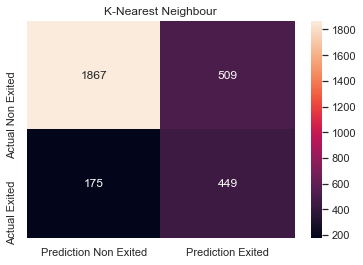

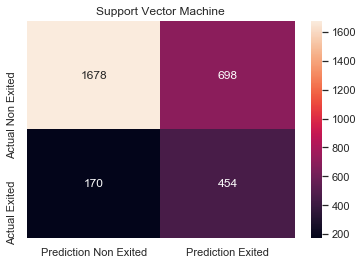

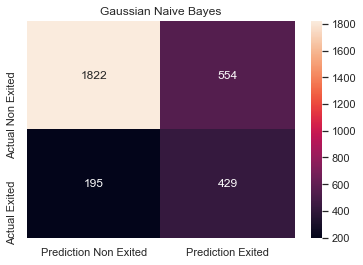

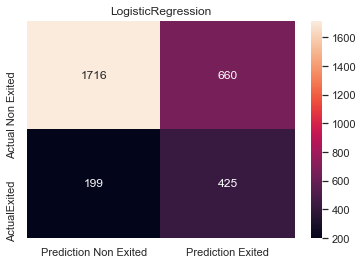

In [106]:
sn.heatmap(KNN_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("K-Nearest Neighbour")
plt.show()
sn.heatmap(SVC_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("Support Vector Machine")
plt.show()
sn.heatmap(GNB_conf_matrix, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("Gaussian Naive Bayes")
plt.show()
sn.heatmap(LR_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","ActualExited"])
plt.title("LogisticRegression")
plt.show()

# Modal Comparison Table *(with all variables)*

In [107]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
import plotly.figure_factory as ff
import plotly.offline as py

# Modelling with usable column *(‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

In [108]:
X_train_usable = X_train[['IsActiveMember','Gender','Geography']]
X_test_usable = X_test[['IsActiveMember','Gender','Geography']]
X_train_usable


,IsActiveMember,Gender,Geography
RowNumber,,,
139,0,0,1
36,0,0,0
552,1,1,2
3164,1,0,2
4713,0,1,0
...,...,...,...
2945,0,1,0
5304,1,1,1
4421,1,0,2


# K-Nearest Neighbour *(‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

In [109]:
KNN2_before = KNeighborsClassifier(n_neighbors=5)
KNN2_before.fit(X_train_usable, Y_train)

KNN2_Y_predict_before = KNN2_before.predict(X_test_usable)
KNN2_acc_score_before = accuracy_score(Y_test,KNN2_Y_predict_before)
KNN2_conf_matrix_before = confusion_matrix(Y_test, KNN2_Y_predict_before)
print(KNN2_acc_score_before, "\n", KNN2_conf_matrix_before)


0.434 
 [[ 844 1532]
 [ 166  458]]


In [110]:
parameter = dict(n_neighbors = list(range(3,50)), weights = ["uniform", "distance"])

grid_search = GridSearchCV(KNN2_before, parameter, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train_usable,Y_train)
best_params = grid_search.best_params_
print(best_params)


{'n_neighbors': 36, 'weights': 'uniform'}


In [111]:
KNN2_after = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
KNN2_after.fit(X_train_usable, Y_train)

KNN2_Y_predict_after = KNN2_after.predict(X_test_usable)
KNN2_acc_score_after = accuracy_score(Y_test, KNN2_Y_predict_after)
KNN2_conf_matrix_after = confusion_matrix(Y_test, KNN2_Y_predict_after)
print(KNN2_acc_score_after, "\n", KNN2_conf_matrix_after)


0.5733333333333334 
 [[1289 1087]
 [ 193  431]]


# Support Vector Machine *(‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

In [112]:
SVC2_before = SVC(kernel='linear',degree=3,gamma='scale')
SVC2_before.fit(X_train_usable, Y_train)

SVC2_Y_predict_before = SVC2_before.predict(X_test_usable)
SVC2_acc_score_before = accuracy_score(Y_test,SVC2_Y_predict_before)
SVC2_conf_matrix_before = confusion_matrix(Y_test,SVC2_Y_predict_before)
print(SVC2_acc_score_before, "\n", SVC2_conf_matrix_before)


0.588 
 [[1356 1020]
 [ 216  408]]


In [113]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  
  
grid = GridSearchCV(SVC2_before, param_grid, refit = True) 

#fitting the model for grid search 
grid = grid.fit(X_train_usable, Y_train) 
grid = grid.best_params_
print(grid) 


{'C': 0.1, 'gamma': 1}


In [114]:
SVC2_after = SVC(C=grid["C"],gamma=grid["gamma"])
SVC2_after.fit(X_train_usable, Y_train)

SVC2_Y_predict_after = SVC2_after.predict(X_test_usable)
SVC2_acc_score_after = accuracy_score(Y_test,SVC2_Y_predict_after)
SVC2_conf_matrix_after = confusion_matrix(Y_test,SVC2_Y_predict_after)
print(SVC2_acc_score_after, "\n", SVC2_conf_matrix_after)


0.611 
 [[1419  957]
 [ 210  414]]


# Gaussian Naive Bayes *(‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

In [115]:
GNB2 = GaussianNB()
GNB2.fit(X_train_usable, Y_train)

GNB2_Y_predict = GNB2.predict(X_test_usable)
GNB2_acc_score = accuracy_score(Y_test,GNB2_Y_predict)
GNB2_conf_matrix = confusion_matrix(Y_test,GNB2_Y_predict)

print(GNB2_acc_score, "\n", GNB2_conf_matrix)


0.654 
 [[1585  791]
 [ 247  377]]


# LogisticRegression *(‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

In [116]:
LR2_before = LogisticRegression()
LR2_before.fit(X_train_usable,Y_train)


LR2_Y_predict_before = LR2_before.predict(X_test_usable)
LR2_acc_score_before = accuracy_score(Y_test,LR2_Y_predict_before)
LR2_conf_matrix_before = confusion_matrix(Y_test,LR2_Y_predict_before)

print(LR2_acc_score_before, "\n", LR2_conf_matrix_before)


0.654 
 [[1585  791]
 [ 247  377]]


In [117]:

param_grid = {'penalty' : ['l2'],'C': np.logspace(0, 4, 10)}  
  
grid = GridSearchCV(LR_before, param_grid,cv=5) 

#fitting the model for grid search 
best_model = grid.fit(X_train,Y_train) 
grid = best_model.best_params_
print(grid) 


{'C': 2.7825594022071245, 'penalty': 'l2'}


In [118]:
LR2_after = LogisticRegression(C = grid['C'], penalty = grid['penalty'])
LR2_after.fit(X_train_usable,Y_train)


LR2_Y_predict_after = LR2_after.predict(X_test_usable)
LR2_acc_score_after = accuracy_score(Y_test,LR2_Y_predict_after)
LR2_conf_matrix_after = confusion_matrix(Y_test,LR2_Y_predict_after)

print(LR2_acc_score_after, "\n", LR2_conf_matrix_after)


0.654 
 [[1585  791]
 [ 247  377]]


# Confusion Matrix * (‘IsActiveMember’, ‘Gender’ and ‘Geography’)*

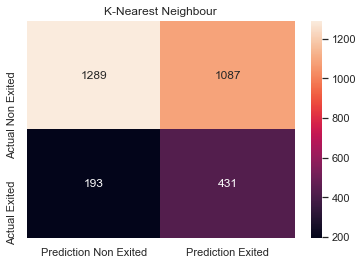

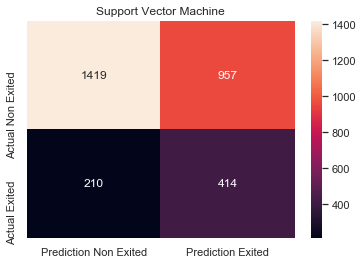

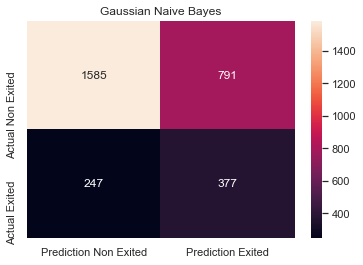

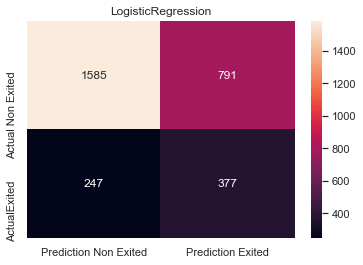

In [119]:
sn.heatmap(KNN2_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("K-Nearest Neighbour")
plt.show()
sn.heatmap(SVC2_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("Support Vector Machine")
plt.show()
sn.heatmap(GNB2_conf_matrix, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","Actual Exited"])
plt.title("Gaussian Naive Bayes")
plt.show()
sn.heatmap(LR2_conf_matrix_after, annot=True,fmt = '.4g', xticklabels=["Prediction Non Exited","Prediction Exited"], yticklabels=["Actual Non Exited","ActualExited"])
plt.title("LogisticRegression")
plt.show()

# Modal Comparison Table *(all variables and usable variables)*

In [120]:
model_name = ["KNN(all variables)","SVM(all variables)"
,"GNB(all variables)","LR(all variables)"
,"KNN(usable variables)","SVM(usable variables)"
,"GNB(usable variables)","LR(usable variables)"]
model_acc_score = [KNN_acc_score_after,SVC_acc_score_after,GNB_acc_score,LR_acc_score_after,KNN2_acc_score_after,SVC2_acc_score_after,GNB2_acc_score,LR2_acc_score_after]
model_Y_predict = [KNN_Y_predict_after,SVC_Y_predict_after,GNB_Y_predict,LR_Y_predict_after,KNN2_Y_predict_after,SVC2_Y_predict_after,GNB2_Y_predict,LR2_Y_predict_after]

model_rec_score = []
model_pre_score = []
model_f1_score = []
model_roc_auc_score = []

for i in range(0,len(model_name),1):
  model_rec_score.append(recall_score(Y_test,model_Y_predict[i]))
  model_pre_score.append(precision_score(Y_test, model_Y_predict[i]))
  model_f1_score.append(f1_score(Y_test, model_Y_predict[i]))
  model_roc_auc_score.append(roc_auc_score(Y_test, model_Y_predict[i]))

model_table = pd.DataFrame({"Model":model_name,"Accuracy_score":model_acc_score,"Recall_score":model_rec_score,"Precision":model_pre_score,"f1_score":model_f1_score,"Area_under_curve":model_roc_auc_score})

model_table = ff.create_table(np.round(model_table,8))

py.iplot(model_table)
print("LR= LogisticRegression")

LR= LogisticRegression


# K-FLow



Based on our project, we have used K-fold cross validation to determine whether the selected model has overfitting problems. Then, we have to ensure that the model will provide us with consistent results when forecasting different datasets. When a model provides us with accurate and precise results during the modeling process, but provides poor results when using another set of data for modeling, it means that the model is essential as overfitting may occur.This is because the model is only applicable to specific data sets.



In [121]:
from sklearn.model_selection import KFold 

In [127]:
X = X_train.append(X_test)
Y = np.concatenate((Y_train,Y_test))

# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_No, test_No in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_No], X.iloc[test_No]
    Y_train, Y_test = Y[train_No], Y[test_No]
    # Train the model
    model = SVC().fit(X_train, Y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(Y_test, model.predict(X_test), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)

[54.71698113207547, 85.23605150214593, 83.86266094420601, 81.71673819742489, 81.11587982832617]


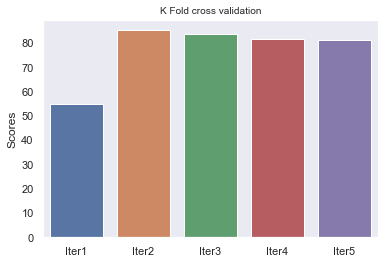

In [128]:
# Visualize accuracy for each iteration

scores = pd.DataFrame(accuracy_model,columns=['Scores'])

sns.set(style="dark", rc={"lines.linewidth": 4})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.title('K Fold cross validation', fontsize=10)


plt.show()
sns.set()

# Conclusion

According to the chart above, the accuracy score of the five iterations are in the acceptable range. As a conclusion, we can know that the SVM model does not has any overfit problems. The advantages of SVM is it works relatively well when there is clear margin of separation between classes. Besides,SVM is more effective in high dimensional spaces. SVM is effective in cases where number of dimensions is greater than the number of samples. SVM is relatively memory efficient. But, SVM also got its limition, SVM is not suitable for large dataset because the when we use svm to find the best parameter, it take long time to search because SVM has many parameters, so it will take a long time.